# Exercise 7.11

In Section 7.7, it was mentioned that GAMs are generally fit using a *backfitting* approach. The idea behind backfitting is actually quite simple. We will now explore backfitting in the context of multiple linear regression.

Suppose that we would like to perform multiple linear regression, but we do not have software to do so. Instead, we only have software to perform simple linear regression. Therefore, we take the following iterative approach: we repeatedly hold all but one coefficient estimate fixed at its current value, and update only that coefficient estimate using a simple linear regression. The process is continued until *convergence*—that is, until the coefficient estimates stop changing.

We now try this out on a toy example.

## (a) Generate a response $Y$ and two predictors $X_1$ and $X_2$, with $n = 100$.

In [ ]:
set.seed(1)
y <- rnorm(100)
x1 <- rnorm(100)
x2 <- rnorm(100)

## (b) Initialize $\widehat{\beta}_1$ to take on a value of your choice. It does not matter what value you choose.

In [ ]:
beta1 <- runif(1, min=-0.5, max=0.5)

## (c) Keeping $\widehat{\beta}_1$ fixed, fit the model
$$Y - \widehat{\beta}_1 X_1 = \beta_0 + \beta_2 X_2 + \epsilon.$$
You can do this as follows:

In [ ]:
a <- y - beta1*x1
beta2 <- lm(a ~ x2)$coef[2]

## (d) Keeping $\widehat{\beta}_2$ fixed, fit the model
$$Y - \widehat{\beta}_2 X_2 = \beta_0 + \beta_1 X_1 + \epsilon.$$
You can do this as follows:

In [ ]:
a <- y - beta2*x2
beta1 <- lm(a ~ x1)$coef[2]

## (e) Write a `for` loop to repeat (c) and (d) 1,000 times. Report the estimates of $\widehat{\beta}_0$, $\widehat{\beta}_1$, and $\widehat{\beta}_2$ at each iteration of the `for` loop. Create a plot in which each of these values is displayed, with $\widehat{\beta}_0$, $\widehat{\beta}_1$, and $\widehat{\beta}_2$ each shown in a different color.

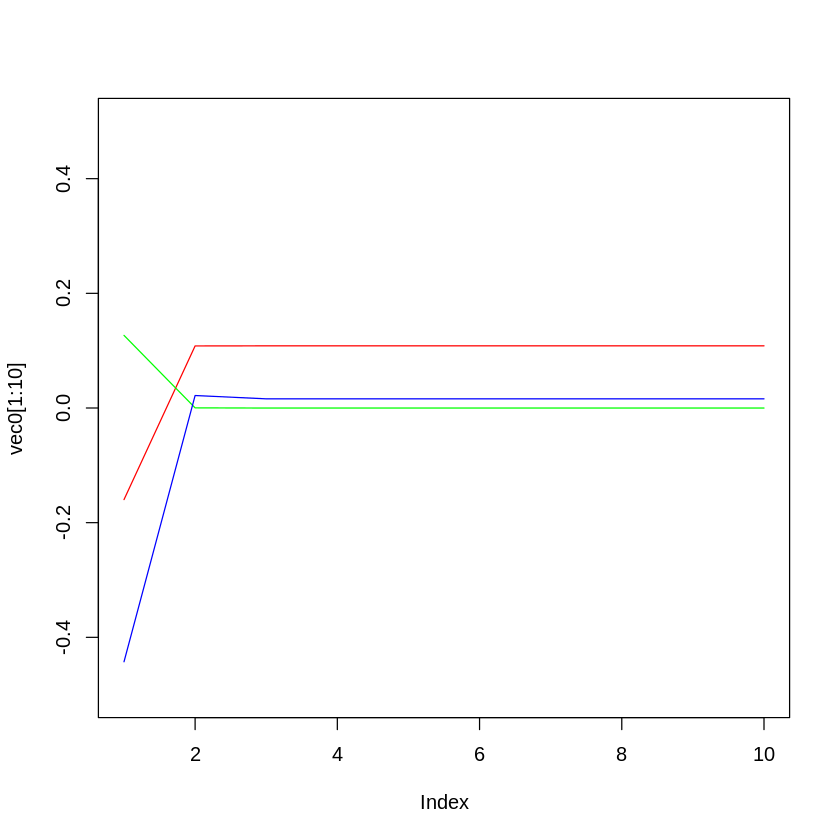

In [ ]:
beta0 <- runif(1, min=-0.5, max=0.5)
beta1 <- runif(1, min=-0.5, max=0.5)
beta2 <- runif(1, min=-0.5, max=0.5)
vec0 <- beta0
vec1 <- beta1
vec2 <- beta2

for (i in 1:1000) {
    beta2 <- lm(y - beta1*x1 ~ x2)$coef[2]
    beta1 <- lm(y - beta2*x2 ~ x1)$coef[2]
    beta0 <- lm(y - beta2*x2 ~ x1)$coef[1]
    vec0 <- c(vec0, beta0)
    vec1 <- c(vec1, beta1)
    vec2 <- c(vec2, beta2)
}

plot(vec0[1:10], ylim=c(-0.5,0.5), col='red', type='l')
lines(vec1[1:10], col='green')
lines(vec2[1:10], col='blue')

## (f) Compare your answer in (e) to the results of simply performing multiple linear regression to predict $Y$ using $X_1$ and $X_2$. Use the `abline()` function to overlay those multiple linear regression coefficient estimates on the plot obtained in (e).

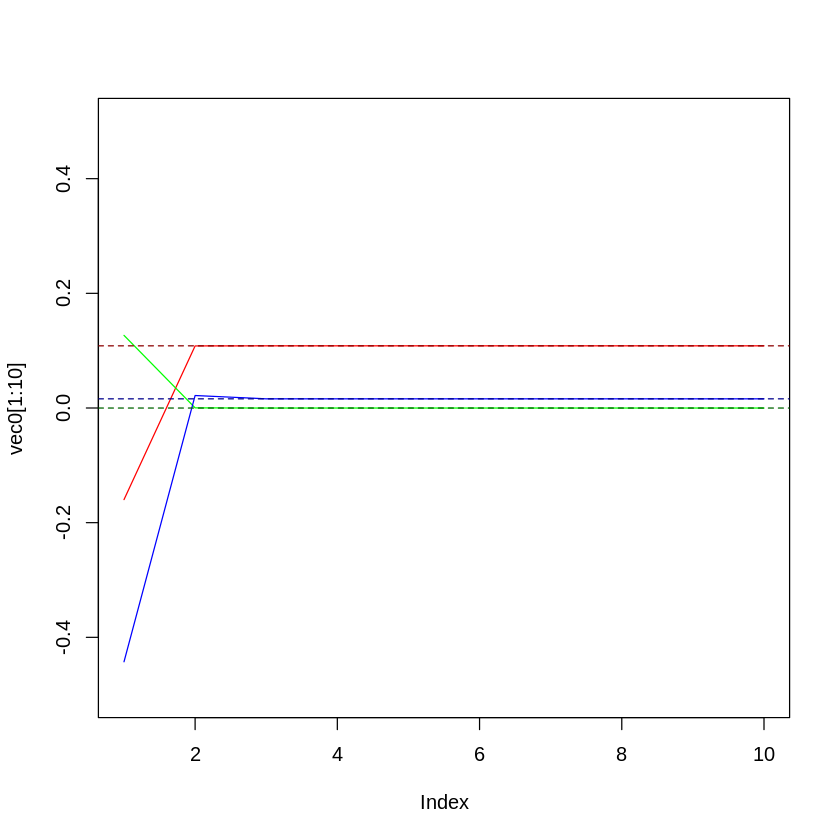

In [ ]:
mlr.fit <- lm(y ~ x1 + x2)
plot(vec0[1:10], col='red', ylim=c(-0.5,0.5), type='l')
lines(vec1[1:10], col='green')
lines(vec2[1:10], col='blue')
abline(h=mlr.fit$coef[1], col='darkred', lty=2)
abline(h=mlr.fit$coef[2], col='darkgreen', lty=2)
abline(h=mlr.fit$coef[3], col='darkblue', lty=2)

## (g) On this data set, how many backfitting iterations were required in order to obtain a "good" approximation to the multiple regression coefficient estimates?

On this data set and the random seed, 2 to 3 backfitting iterations were enough.